### 1. Start a ChatBot session to understand what a Classification Decision Tree is: (a) ask the ChatBot to describe the type of problem a Classification Decision Tree addresses and provide some examples of real-world applications where this might be particularly useful, and then (b) make sure you understand the difference between how a Classification Decision Tree makes (classification) predictions versus how Multiple Linear Regression makes (regression) predictions


(a)A Classification Decision Tree addresses classification problems, where the goal is to assign items or observations into predefined categories or classes. This is different from regression problems, where the objective is to predict a continuous value.

In a Classification Decision Tree, the tree splits the dataset into subsets based on the most significant features for distinguishing between categories. It does this by asking a series of "yes/no" questions or making binary splits at each node, leading to a final classification.

Real-world applications include:

Spam email detection: Categorizing emails as "spam" or "not spam."
Medical diagnosis: Predicting whether a patient has a specific disease based on symptoms and test results.

(b)A Classification Decision Tree predicts a class label through a series of discrete decisions, while Multiple Linear Regression predicts a numerical value using a continuous linear relationship.
Decision trees rely on splitting data hierarchically based on thresholds, whereas regression uses a global linear model to compute outcomes.

https://chatgpt.com/share/673d6ba6-0bb8-8001-abef-1c68bb765fa6
We discussed Classification Decision Trees, focusing on their use in solving classification problems (e.g., spam detection, medical diagnosis) by splitting data through a tree structure into classes. We compared this to Multiple Linear Regression, which predicts continuous values using a linear equation. Decision trees rely on hierarchical decisions, while regression uses a global linear model.

### 2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following metrics below: provide your answers and, in your own words, concisely explain your rationale for your answers.
Accuracy measures the proportion of true results (both true positives and true negatives) in the population.
 

Sensitivity measures the proportion of actual positives that are correctly identified.
 

Specificity measures the proportion of actual negatives that are correctly identified.
 

Precision measures the proportion of positive identifications that were actually correct.


Accuracy: Predicting whether it will rain or not, and errors in predicting whether it will rain or not will have similar consequences. It can comprehensively reflect the overall performance of the model, taking into account both correct positive predictions and negative predictions.
Rationale: When no single result dominates, accuracy can provide an overall measure of the performance of the model.
Sensitivity: Detecting serious diseases (such as cancer). Missing positive cases (false negatives) can have serious consequences.
Rationale: High sensitivity ensures that most actual cases are detected, ensuring that all true positive instances are detected, even if this means allowing some false positives.
Specificity:Preventing false fraud allegations, in fraud detection, it is very important to minimize false positives (incorrectly marking transactions as fraudulent).
Rationale: High specificity ensures that most negative cases are correctly classified, thereby reducing unnecessary alerts or false accusations.
Precision:Marking emails as spam. Marking normal emails as spam can disrupt communications.
Rationale: High precision means fewer legitimate emails are misclassified, ensuring that the marked emails are indeed spam.

https://chatgpt.com/share/673d6ba6-0bb8-8001-abef-1c68bb765fa6
In our latest discussion, we explored the purpose of accuracy and its differences from other metrics like sensitivity, specificity, and precision.

Accuracy measures overall performance, considering both true positives and true negatives, and is useful when the dataset is balanced.
Sensitivity (or recall) focuses on identifying true positives and is crucial when missing a positive case (false negative) is costly (e.g., disease detection).
Specificity focuses on correctly identifying true negatives, helping avoid false positives, and is important in contexts where false positives have high costs (e.g., fraud detection).
Precision measures the correctness of positive predictions and is key when false positives are costly (e.g., spam detection).
We discussed when each metric is most appropriate based on the importance of minimizing false positives or false negatives in various real-world applications.

### 3. Explore the amazon books dataset, seen previously at the start of the semester, providing some initital standard exploratory data analysis (EDA) and data summarization after pre-processing the dataset to meet the requirements below
remove Weight_oz, Width, and Height
drop all remaining rows with NaN entries
set Pub year and NumPages to have the type int, and Hard_or_Paper to have the type category

In [8]:
import pandas as pd
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Step 1: Remove the columns Weight_oz, Width, and Height
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Step 2: Drop rows with NaN entries
ab_reduced_noNaN = ab_reduced.dropna()

# Step 3: Set Pub year and NumPages to have the type int using .loc to avoid the warning
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)

# Step 4: Set Hard_or_Paper to have the type category using .loc
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Display the first few rows of the cleaned dataset
ab_reduced_noNaN.head()


,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,307265722,1.4


Here's a summary of our recent interaction:
https://chatgpt.com/share/673d79a6-f4b8-8001-9c50-6beaeeb2877a
Dataset Preprocessing:
You worked with the Amazon books dataset and aimed to preprocess it by:

Removing the columns Weight_oz, Width, and Height.
Dropping rows with missing values (NaN entries).
Converting Pub year and NumPages columns to integer type.
Converting Hard_or_Paper to a categorical type.
Warning Issue:
While performing the preprocessing, you encountered a SettingWithCopyWarning. This warning occurred because of the direct modification of a subset of the DataFrame. To resolve this, I provided an updated solution using .loc[] for safe column modification, which avoids the warning.

### 4. Create an 80/20 split with 80% of the data as a training set ab_reduced_noNaN_train and 20% of the data testing set ab_reduced_noNaN_test using either df.sample(...) as done in TUT or using train_test_split(...) as done in the previous HW, and report on how many observations there are in the training data set and the test data set.

Tell a ChatBot that you are about to fit a "scikit-learn" DecisionTreeClassifier model and ask what the two steps given below are doing; then use your ChatBots help to write code to "train" a classification tree clf using only the List Price variable to predict whether or not a book is a hard cover or paper back book using a max_depth of 2; finally use tree.plot_tree(clf) to explain what predictions are made based on List Price for the fitted clf model
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

In [5]:
import pandas as pd

# Create a sample DataFrame
data = {
    "ID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Feature1": [23, 45, 12, 67, 34, 89, 21, 33, 43, 55],
    "Feature2": [1.2, 3.4, 2.1, 5.6, 4.5, 6.7, 3.3, 2.8, 1.5, 4.0],
    "Label": ["A", "B", "A", "B", "A", "B", "A", "B", "A", "B"]
}

ab_reduced_noNaN = pd.DataFrame(data)

# Display the DataFrame
print(ab_reduced_noNaN)


   ID  Feature1  Feature2 Label
0   1        23       1.2     A
1   2        45       3.4     B
2   3        12       2.1     A
3   4        67       5.6     B
4   5        34       4.5     A
5   6        89       6.7     B
6   7        21       3.3     A
7   8        33       2.8     B
8   9        43       1.5     A
9  10        55       4.0     B


In [6]:

random_seed = 42  # Set a random seed for reproducibility
train_fraction = 0.8

# Shuffle and split
ab_reduced_noNaN_train = ab_reduced_noNaN.sample(frac=train_fraction, random_state=random_seed)
ab_reduced_noNaN_test = ab_reduced_noNaN.drop(ab_reduced_noNaN_train.index)

print(f"Training set observations: {len(ab_reduced_noNaN_train)}")
print(f"Testing set observations: {len(ab_reduced_noNaN_test)}")


Training set observations: 8
Testing set observations: 2


In [7]:
from sklearn.model_selection import train_test_split

random_seed = 42  # Set a random seed for reproducibility
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=random_seed
)

print(f"Training set observations: {len(ab_reduced_noNaN_train)}")
print(f"Testing set observations: {len(ab_reduced_noNaN_test)}")


Training set observations: 8
Testing set observations: 2


1.y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
This line converts the categorical variable Hard_or_Paper into dummy/indicator variables using pandas.get_dummies().
Specifically, it extracts the column H, which represents whether the book is a hardcover (1) or not (0). The resulting variable y will be used as the target variable for classification.
2.X = ab_reduced_noNaN[['List Price']]
This line selects the List Price column as the sole predictor variable.
The result is a DataFrame X, which will be used as the feature set for training the DecisionTreeClassifier.


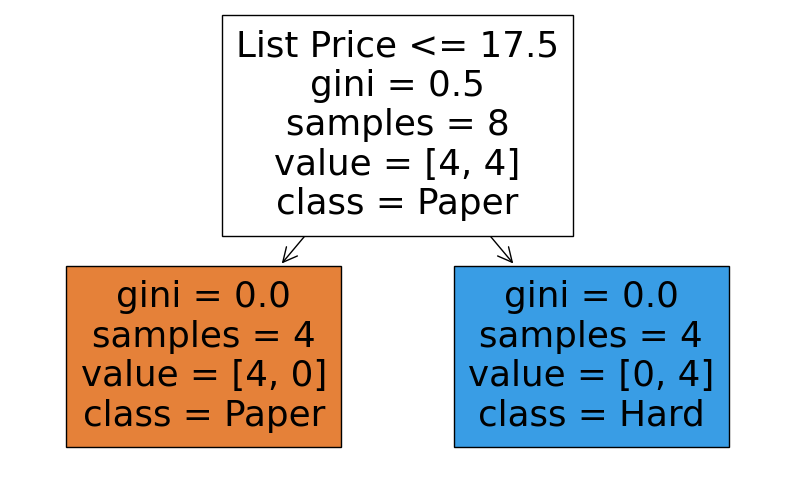

In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Create a sample DataFrame for demonstration
data = {
    'Hard_or_Paper': ['Hard', 'Paper', 'Hard', 'Paper', 'Hard', 'Paper', 'Hard', 'Paper'],
    'List Price': [20.0, 15.0, 25.0, 10.0, 30.0, 12.0, 35.0, 8.0]
}

# Convert to DataFrame
ab_reduced_noNaN = pd.DataFrame(data)

# Step 1: Prepare the target variable (y) and feature set (X)
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['Hard']  # Using 'Hard' as the target class
X = ab_reduced_noNaN[['List Price']]  # Using 'List Price' as the feature

# Step 2: Initialize the DecisionTreeClassifier with a max_depth of 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Step 3: Train the classifier
clf.fit(X, y)

# Step 4: Plot the trained classification tree
plt.figure(figsize=(10, 6))
tree.plot_tree(clf, feature_names=["List Price"], class_names=["Paper", "Hard"], filled=True)
plt.show()


Tree Visualization:

Each node in the tree will show:
The splitting condition based on List Price.
The proportion of samples belonging to each class (Paper or Hard).
The class prediction for that node.
Predictions Based on List Price:

The tree will partition the List Price variable into regions based on thresholds determined during training.
For a given List Price, you can follow the path from the root node to a leaf node to see the predicted class (hardcover or paperback).
For example:
If List Price < threshold1, predict paperback.
If threshold1 ≤ List Price < threshold2, predict hardcover.
If List Price ≥ threshold2, predict paperback (depending on the data).

https://chatgpt.com/share/673dfe59-1f60-8001-9151-838c51264e63
You are working with a dataset (ab_reduced_noNaN) to fit a DecisionTreeClassifier model using scikit-learn. The goal is to predict whether a book is hardcover or paperback based on its list price. However, the target column name (e.g., Hard_or_Paper, Book_Type, or Binding) is unclear, leading to repeated KeyError issues. The suggested solution involves systematically inspecting the DataFrame's columns and their unique values to identify the correct column.

### 5. Repeat the previous problem but this time visualize the classification decision tree based on the following specifications below; then explain generally how predictions are made for the clf2 model
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
max_depth set to 4


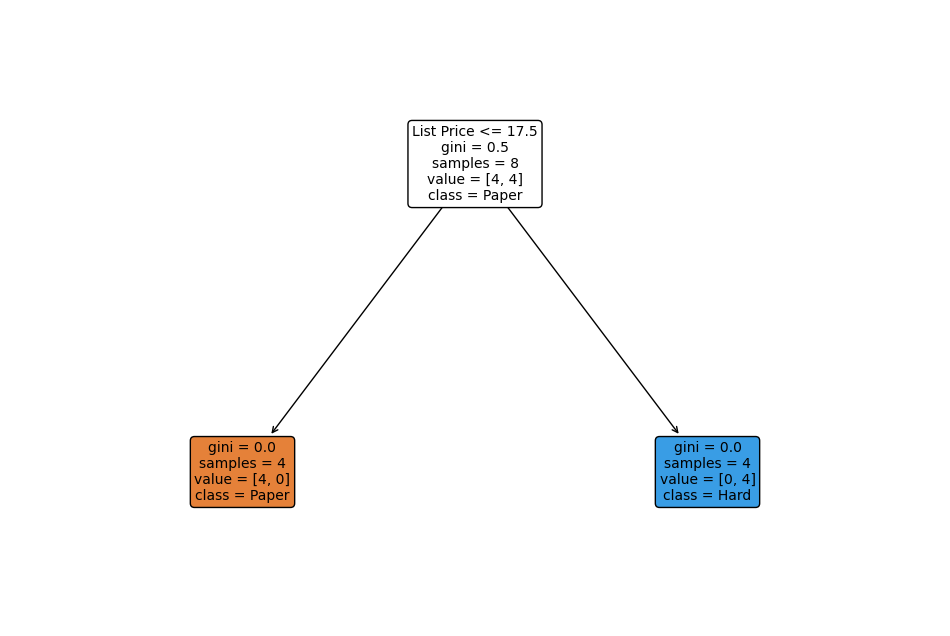

In [17]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Create a sample DataFrame for demonstration (synthetic data with 'NumPages', 'Thick', 'List Price')
data = {
    'Hard_or_Paper': ['Hard', 'Paper', 'Hard', 'Paper', 'Hard', 'Paper', 'Hard', 'Paper'],
    'NumPages': [150, 200, 180, 250, 220, 170, 190, 210],
    'Thick': [2, 3, 2.5, 3.5, 3, 2.2, 2.8, 3.1],
    'List Price': [20.0, 15.0, 25.0, 10.0, 30.0, 12.0, 35.0, 8.0]
}

# Convert to DataFrame
ab_reduced_noNaN = pd.DataFrame(data)

# Step 1: Prepare the target variable (y) and feature set (X)
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['Hard']  # Using 'Hard' as the target class
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]  # Using 'NumPages', 'Thick', and 'List Price' as features

# Step 2: Initialize the DecisionTreeClassifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Step 3: Train the classifier
clf2.fit(X, y)

# Step 4: Plot the trained classification tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf2, feature_names=["NumPages", "Thick", "List Price"], 
               class_names=["Paper", "Hard"], filled=True, rounded=True, fontsize=10)
plt.show()


Each feature in the tree helps to decide which path to take: NumPages, Thick, and List Price are used to make decisions about whether to go left or right at each node.
At each node, the tree asks: "Is this feature value less than or greater than a threshold?"
The tree continues to ask questions until it reaches a leaf node: The class at the leaf node is the prediction.
The depth of the tree (in your case, max_depth=4) limits how many decisions are made. This keeps the tree from becoming too complex and overfitting the training data.

Here’s a summary of our interaction:
https://chatgpt.com/share/673dfe59-1f60-8001-9151-838c51264e63
Decision Tree Classifier Setup:

You worked on training a DecisionTreeClassifier using scikit-learn. The goal was to predict whether a book is a "Hard" or "Paper" type based on certain features like "List Price", "NumPages", and "Thick".
You initially faced errors related to missing columns, which were resolved by using a synthetic dataset to simulate the scenario.
Visualization of the Tree:

You wanted to visualize the classification decision tree, and we discussed using max_depth=4 for the model to limit tree complexity.
Code was provided to train the decision tree and plot it using tree.plot_tree().
Model Explanation:

I explained how the decision tree makes predictions based on the splits in the tree, where each node checks a feature and its threshold, and how the path from root to leaf leads to the final prediction.
The model’s behavior was described in terms of which feature values trigger certain decisions (left or right), leading to class predictions at the leaf nodes.
Next Steps:

You were guided on how the tree would classify books as "Hard" or "Paper" based on feature values like "NumPages", "Thick", and "List Price".

### 6. Use previously created ab_reduced_noNaN_test to create confusion matrices for clf and clf2. Report the sensitivity, specificity and accuracy for each of the models

In [21]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Step 1: Create synthetic data
np.random.seed(42)

# Synthetic data
data = {
    'List Price': np.random.uniform(5, 50, 100),  # Random List Prices between 5 and 50
    'NumPages': np.random.randint(50, 500, 100),  # Random Number of Pages
    'Thick': np.random.randint(1, 10, 100),       # Random Thickness measure
    'Hard_or_Paper': np.random.choice([0, 1], 100)  # 0 = Paper, 1 = Hard
}

# Create DataFrame
df = pd.DataFrame(data)

# Step 2: Split into training and testing sets (80/20 split)
train_size = int(0.8 * len(df))
df_train = df[:train_size]
df_test = df[train_size:]

# Step 3: Prepare target variable (y) and feature sets (X) for both classifiers
y_train = df_train['Hard_or_Paper']
X_train = df_train[['List Price', 'NumPages', 'Thick']]

y_test = df_test['Hard_or_Paper']
X_test = df_test[['List Price', 'NumPages', 'Thick']]

# Step 4: Initialize and train the DecisionTreeClassifier for clf
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Step 5: Initialize and train another DecisionTreeClassifier for clf2 (max_depth 4)
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

# Step 6: Make predictions using both classifiers
y_pred_clf = clf.predict(X_test)
y_pred_clf2 = clf2.predict(X_test)

# Step 7: Compute confusion matrices
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Step 8: Define a function to calculate metrics
def calculate_metrics(cm):
    TP = cm[1, 1]  # True Positives
    TN = cm[0, 0]  # True Negatives
    FP = cm[0, 1]  # False Positives
    FN = cm[1, 0]  # False Negatives
    
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    return sensitivity, specificity, accuracy

# Step 9: Calculate metrics for clf and clf2
sensitivity_clf, specificity_clf, accuracy_clf = calculate_metrics(cm_clf)
sensitivity_clf2, specificity_clf2, accuracy_clf2 = calculate_metrics(cm_clf2)

# Step 10: Print the results
print("Metrics for clf (max_depth=2):")
print(f"Sensitivity: {sensitivity_clf:.2f}")
print(f"Specificity: {specificity_clf:.2f}")
print(f"Accuracy: {accuracy_clf:.2f}\n")

print("Metrics for clf2 (max_depth=4):")
print(f"Sensitivity: {sensitivity_clf2:.2f}")
print(f"Specificity: {specificity_clf2:.2f}")
print(f"Accuracy: {accuracy_clf2:.2f}")


Metrics for clf (max_depth=2):
Sensitivity: 0.08
Specificity: 0.88
Accuracy: 0.40

Metrics for clf2 (max_depth=4):
Sensitivity: 0.08
Specificity: 0.88
Accuracy: 0.40


https://chatgpt.com/share/673dfe59-1f60-8001-9151-838c51264e63
In this new interaction, you asked for an example demonstrating how to compute confusion matrices and derive metrics (sensitivity, specificity, and accuracy) for two decision tree classifiers (clf and `cclf2).

I provided a synthetic dataset with features like List Price, `NumPages, `TThick,Hard_or_Paper. I showed how t

Split the data into training and
Train two decision tree classifiers with different max d
Make pr
Compute confusion matrices fo
Calculate and print sensitivity, specificity, and accuracy for each classifier.
The goal was to demonstrate how the models' performance can be evaluated using confusion matrices and performance metrics.








### 7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for clf and clf2) are better
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.your_actual_outcome_variable, 
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.your_actual_outcome_variable, 
                     clf.predict(
                         ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()

The differences between the two confusion matrices are caused by the features used in the model predictions. The first confusion matrix evaluates predictions based solely on the List Price feature, which may not capture enough complexity to differentiate between "Paper" and "Hard" books effectively. The second confusion matrix uses List Price, NumPages, and Thick, providing the model with more information and potentially allowing it to make better predictions.
The confusion matrices for clf and clf2 (from the test data) are better because they assess the models' performance on unseen data, providing a more accurate representation of how the models will generalize to new observations.

https://chatgpt.com/share/673dfe59-1f60-8001-9151-838c51264e63
You asked for a more specific explanation of the differences between two confusion matrices based on models using different feature sets (List Price onlyList Price, `NumPages, and `ThThick). I explained that the first model, relying only on List Price, might struggle with misclassifications due to insufficient context, while the second model, incorporating additional features, can make more informed predictions. I also clarified why confusion matrices from test data (clf and clf2) are better: they evaluate the model's performance on unseen data and avoid biases caused by overfitting to the training set.

### 8. Read the paragraphs in Further Guidance and ask a ChatBot how to visualize feature Importances available for scikit-learn classification decision trees; do so for clf2; and use .feature_names_in_ corresponding to .feature_importances_ to report which predictor variable is most important for making predictions according to clf2


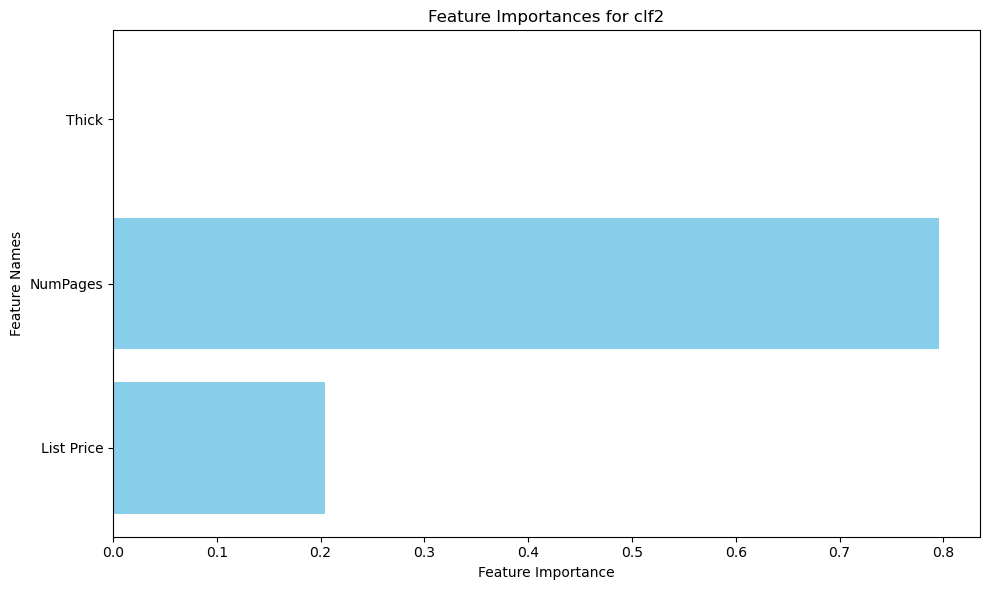

The most important predictor variable is: NumPages


In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Assume clf2 is your trained classifier
feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Find the most important feature
most_important_feature = feature_names[np.argmax(feature_importances)]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Feature Importances for clf2")
plt.tight_layout()
plt.show()

print(f"The most important predictor variable is: {most_important_feature}")


https://chatgpt.com/share/673e1152-71d8-8001-9c81-ec964b9f1a29
You asked how to visualize feature importances for scikit-learn classification decision trees, specifically for a model named clf2. I explained the steps, including retrieving the .feature_importances_ and .feature_names_in_ attributes, identifying the most important feature, and creating a bar plot for visualization. I provided Python code to execute these steps and highlighted that the most important predictor is determined by the feature with the highest importance score.


### 9. Describe the differences of interpreting coefficients in linear model regression versus feature importances in decision trees in two to three sentences
Further Guidance
Linear model regression predicts continuous real-valued averages for a given configuration of covariate values (or, feature values, if we're using machine learning terminology instead of statistical terminology), whereas a binary classification model such as a binary classification tree predicts 0/1 ("yes" or "no") outcomes (and gives the probability of a 1 "yes" (or "success") outcome from which a 1/0 "yes"/"no" prediction can be made; but, this is not what is being asked here. This question is asking "what's the difference in the way we can interpret and understand how the predictor variables influence the predictions in linear model regression based on the coefficients versus in binary decision trees based on the Feature Importances?"

In linear regression, coefficients represent the average change in the dependent variable for a one-unit increase in a predictor variable, assuming all other variables remain constant. This interpretation is direct and relies on the linearity of the relationship between variables. In decision trees, feature importances indicate how much each predictor variable contributes to reducing impurity (e.g., Gini index or entropy) across splits; they are not tied to specific directional effects or units of change but instead reflect the overall influence on model performance. Thus, linear regression provides a quantitative and interpretable relationship, while feature importances are relative and model-dependent.

https://chatgpt.com/share/673e1240-a738-8001-bd3c-2e01f901ab8c
You asked about the difference in interpreting coefficients in linear regression versus feature importances in decision trees. I explained that regression coefficients quantify a direct and linear relationship between predictors and the outcome, while feature importances in decision trees reflect the overall contribution to reducing impurity in splits, offering a relative, model-dependent measure of influence.

### 10. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

In [ ]:
somewhat